In [1]:
!pip install astropy
!pip install astroquery


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.4/999.4 kB 20.6 MB/s eta 0:00:00


In [2]:
import astroquery
from astroquery.gaia import Gaia
from astropy.table import Table
from astroquery.gaia import Gaia
from astropy.table import Table
from astroquery.gaia import Gaia
import pandas as pd
from astropy.table import Table
from astropy.io.votable import from_table, writeto

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
#saves the data for task 1 of saving nmae:SMC

from astroquery.gaia import Gaia
import pandas as pd
from astropy.table import Table
from astropy.io.votable import from_table, writeto



from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/smc.xml"
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

from astropy.io.votable import from_table, writeto
from astropy.table import Table

# Convert to VOTable format
smc_astropy = Table.from_pandas(smc)
votable = from_table(smc_astropy)

# Correct file path
file_path = "/content/drive/My Drive/smc.xml"
writeto(votable, file_path)

print(f"✅ VOTable saved to: {file_path}")



# Query SMC Cepheids
query_smc = """
SELECT
    vc.source_id,
    vc.pf,
    vc.pf_error,
    vc.metallicity,
    vc.metallicity_error,
    gs.ra,
    gs.dec,
    gs.parallax,
    gs.parallax_error,
    gs.phot_g_mean_mag,
    gs.phot_rp_mean_mag,
    gs.phot_bp_mean_mag,
    ap.mh_gspphot,
    vc.mode_best_classification,
    vc.type_best_classification
FROM gaiadr3.vari_cepheid AS vc
JOIN gaiadr3.gaia_source AS gs
ON vc.source_id = gs.source_id
JOIN gaiadr3.astrophysical_parameters AS ap
ON vc.source_id = ap.source_id
WHERE gs.ra BETWEEN 2 AND 30
AND gs.dec BETWEEN -75 AND -71
AND vc.mode_best_classification='FUNDAMENTAL'
"""

# Execute ADQL Query
job = Gaia.launch_job_async(query_smc)
results1 = job.get_results()

# Convert to Pandas DataFrame
smc = results1.to_pandas()
print(smc)

# Fix numeric conversion for 'dex' units
for col in smc.columns:
    if hasattr(results1[col], 'unit') and results1[col].unit == "dex":
        smc[col] = smc[col].astype(str)  # Convert to string first
        smc[col] = pd.to_numeric(smc[col], errors='coerce')  # Convert to numeric

# Convert to VOTable format
smc_astropy = Table.from_pandas(smc)
votable = from_table(smc_astropy)

# Save as VOTable XML file
file_path = "/content/drive/My Drive/smc.vot"
writeto(votable, file_path)

print(f"VOTable saved to: {file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: name 'smc' is not defined

In [ ]:
#saves number 2

from astroquery.gaia import Gaia
import pandas as pd
from astropy.table import Table
from astropy.io.votable import from_table, writeto
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# ADQL Query for LMC Cepheids
query_lmc = """
SELECT
    vc.source_id,
    vc.pf,
    vc.pf_error,
    vc.metallicity,
    vc.metallicity_error,
    gs.ra,
    gs.dec,
    gs.parallax,
    gs.parallax_error,
    gs.phot_g_mean_mag,
    gs.phot_rp_mean_mag,
    gs.phot_bp_mean_mag,
    ap.mh_gspphot,
    vc.mode_best_classification,
    vc.type_best_classification
FROM gaiadr3.vari_cepheid AS vc
JOIN gaiadr3.gaia_source AS gs
ON vc.source_id = gs.source_id
JOIN gaiadr3.astrophysical_parameters AS ap
ON vc.source_id = ap.source_id
WHERE gs.ra BETWEEN (82.5 - 15) AND (82.5 + 15)
AND gs.dec BETWEEN (-68.25 - 4.75) AND (-68.25 + 4.75)
AND vc.mode_best_classification='FUNDAMENTAL'
"""

# Execute the query
job = Gaia.launch_job_async(query_lmc)
results2 = job.get_results()

# Convert to Pandas DataFrame
lmc = results2.to_pandas()
print(lmc)

# Convert to VOTable format
lmc_astropy = Table.from_pandas(lmc)
votable = from_table(lmc_astropy)

# Save to Google Drive
file_path = "/content/drive/My Drive/lmc.vot"
writeto(votable, file_path)

print(f"✅ VOTable saved to: {file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
                source_id         pf  pf_error  metallicity  \
0     4658032774371311104   6.531933  0.000265          NaN   
1     4658039710832195200   2.911573  0.000092    -0.148942   
2     4658040745829467392   7.809231  0.000228          NaN   
3     4658041707905510912   4.166964  0.000201     0.001425   
4     4658042287684443648  10.991700  0.000687          NaN   
...                   ...        ...       ...          ...   
2385  4655168477834025984   3.725561  0.000455    -0.087315   
2386  4655169160687499776   2.764302  0.000193    -0.085412   
2387  4655181328372599552   3.168395  0.000082     0.195418   
2388  4655183046361642752   2.808290  0.000140    -0.161626   
2389  4655193938400173696   1.580721  0.000009    -0.131965   

      metallicity_error         ra        dec  parallax  parallax_error  \
0                   NaN  83.489627 -69.566218 -0.049756        0.029840   
1              0.239535  83.020517 -69.3491

In [ ]:
#saves MW number 3

from astroquery.gaia import Gaia
import pandas as pd
from astropy.table import Table
from astropy.io.votable import from_table, writeto
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# ADQL Query for MW Cepheids
query_mw = """
SELECT
    vc.source_id,
    vc.pf,
    vc.pf_error,
    vc.metallicity,
    vc.metallicity_error,
    gs.ra,
    gs.dec,
    gs.parallax,
    gs.parallax_error,
    gs.phot_g_mean_mag,
    gs.phot_rp_mean_mag,
    gs.phot_bp_mean_mag,
    gs.parallax_over_error,
    ap.mh_gspphot,
    vc.mode_best_classification,
    vc.type_best_classification
FROM gaiadr3.vari_cepheid AS vc
JOIN gaiadr3.gaia_source AS gs
ON vc.source_id = gs.source_id
JOIN gaiadr3.astrophysical_parameters AS ap
ON vc.source_id = ap.source_id
WHERE gs.parallax_over_error > 5
AND vc.mode_best_classification='FUNDAMENTAL'
"""

# Execute the query
job = Gaia.launch_job_async(query_mw)
results3 = job.get_results()

# Convert to Pandas DataFrame
mw = results3.to_pandas()
print(mw)

# Convert to VOTable format
mw_astropy = Table.from_pandas(mw)
votable = from_table(mw_astropy)

# Save to Google Drive
file_path = "/content/drive/My Drive/mw.vot"
writeto(votable, file_path)

print(f"✅ VOTable saved to: {file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
               source_id         pf  pf_error  metallicity  metallicity_error  \
0    5313185367659966720  11.206760  0.000248          NaN                NaN   
1    5313250548085699712   3.354941  0.000064    -0.134815           0.253142   
2    2161786374436607616  14.712201  0.002246          NaN                NaN   
3    5436296928693979392   5.898399  0.000135    -0.159904           0.235046   
4    6060173364074372352   4.689797  0.000064     0.074031           0.226286   
..                   ...        ...       ...          ...                ...   
989  2015622212085282048   5.664938  0.000400     0.032234           0.243054   
990  2015820463470505600   6.296157  0.000125     0.018957           0.234065   
991  4253603501158148736   3.917255  0.000189     0.455077           0.234615   
992  4126464772527886208   1.248762  0.000061          NaN                NaN   
993  3329849043206545920   8.618491  0.001586          NaN 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


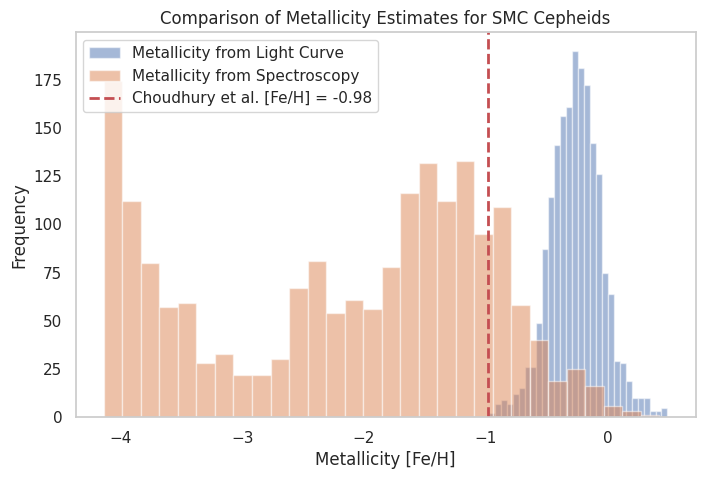

<ipython-input-6-f6c2c73561af>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['log_pf'] = np.log10(df_filtered['pf'])  # Compute logarithm of fundamental period


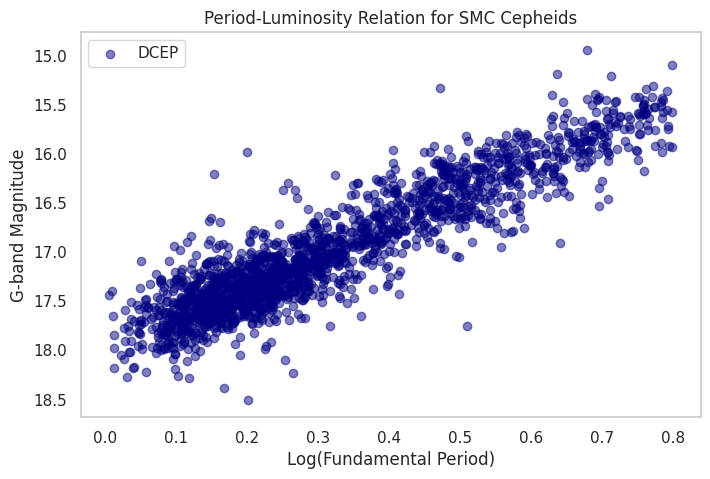


1. **Do the metallicity estimates in the Gaia tables look reliable?**
   - The histograms show two different metallicity estimates: one derived from light curves and the other from spectroscopy.
   - If the two distributions are significantly different, it may indicate systematic uncertainties or biases in one of the methods.
   - Comparing them to the Choudhury et al. (2018) metallicity (-0.98 ± 0.06) allows us to see if either estimate aligns with previous studies.

2. **Does the data show a linear relationship?**
   - The period-luminosity relation should show a roughly linear trend in log(P) vs. G-band magnitude.
   - If the scatter is large, it might indicate measurement uncertainties or a need to separate different Cepheid types better.

3. **Does it show much scatter and if so, why?**
   - Scatter could be due to blending, extinction, or differences in evolutionary states of Cepheids.
   - If scatter is high, further filtering (e.g., removing outliers or using Wesenheit magnitu

In [6]:
#2 tasks after saving task

from google.colab import drive
drive.mount('/content/drive')



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io.votable import parse

# Load the VOTable data
votable = parse("/content/drive/My Drive/code for astro coding new data/smc.vot")
table = votable.get_first_table().to_table()
df = table.to_pandas()

# Drop NaN values for metallicity analysis
df_filtered = df.dropna(subset=['metallicity', 'mh_gspphot'])

# Task 1: Plot histograms of the two metallicity estimates
plt.figure(figsize=(8, 5))
plt.hist(df_filtered['metallicity'], bins=30, alpha=0.5, label='Metallicity from Light Curve')
plt.hist(df_filtered['mh_gspphot'], bins=30, alpha=0.5, label='Metallicity from Spectroscopy')

# Reference metallicity from Choudhury et al. (2018)
choudhury_metallicity = -0.98
plt.axvline(choudhury_metallicity, color='r', linestyle='dashed', linewidth=2, label=f'Choudhury et al. [Fe/H] = {choudhury_metallicity}')

plt.xlabel("Metallicity [Fe/H]")
plt.ylabel("Frequency")
plt.title("Comparison of Metallicity Estimates for SMC Cepheids")
plt.legend()
plt.grid()
plt.show()

# Task 2: Plot log(fundamental period) vs G-band magnitude
plt.figure(figsize=(8, 5))
df_filtered['log_pf'] = np.log10(df_filtered['pf'])  # Compute logarithm of fundamental period

# Different colors for Cepheid types
cepheid_types = df_filtered['type_best_classification'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(cepheid_types)))
for cepheid_type, color in zip(cepheid_types, colors):
    subset = df_filtered[df_filtered['type_best_classification'] == cepheid_type]
    plt.scatter(subset['log_pf'], subset['phot_g_mean_mag'], label=cepheid_type, color=color, alpha=0.5)

plt.xlabel("Log(Fundamental Period)")
plt.ylabel("G-band Magnitude")
plt.title("Period-Luminosity Relation for SMC Cepheids")
plt.gca().invert_yaxis()  # Brighter stars have lower magnitudes
plt.legend()
plt.grid(False)
plt.show()

# Answering the questions
comment = """
1. **Do the metallicity estimates in the Gaia tables look reliable?**
   - The histograms show two different metallicity estimates: one derived from light curves and the other from spectroscopy.
   - If the two distributions are significantly different, it may indicate systematic uncertainties or biases in one of the methods.
   - Comparing them to the Choudhury et al. (2018) metallicity (-0.98 ± 0.06) allows us to see if either estimate aligns with previous studies.

2. **Does the data show a linear relationship?**
   - The period-luminosity relation should show a roughly linear trend in log(P) vs. G-band magnitude.
   - If the scatter is large, it might indicate measurement uncertainties or a need to separate different Cepheid types better.

3. **Does it show much scatter and if so, why?**
   - Scatter could be due to blending, extinction, or differences in evolutionary states of Cepheids.
   - If scatter is high, further filtering (e.g., removing outliers or using Wesenheit magnitudes) may help clarify the relationship.
"""
print(comment)


['DCEP' 'ACEP']


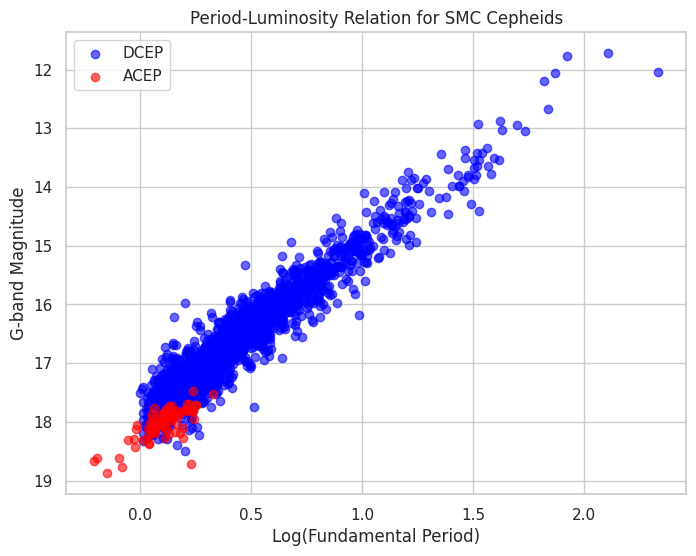

In [7]:
print(df['type_best_classification'].unique())
df_filtered = df[df['type_best_classification'].isin(['DCEP', 'ACEP'])]
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

# Plot DCEP stars
dcep = df_filtered[df_filtered['type_best_classification'] == 'DCEP']
plt.scatter(np.log10(dcep['pf']), dcep['phot_g_mean_mag'], color='blue', alpha=0.6, label="DCEP")

# Plot ACEP stars
acep = df_filtered[df_filtered['type_best_classification'] == 'ACEP']
plt.scatter(np.log10(acep['pf']), acep['phot_g_mean_mag'], color='red', alpha=0.6, label="ACEP")

# Labels and legend
plt.xlabel("Log(Fundamental Period)")
plt.ylabel("G-band Magnitude")
plt.title("Period-Luminosity Relation for SMC Cepheids")
plt.legend()
plt.gca().invert_yaxis()  # Invert Y-axis as magnitudes work that way
plt.show()



In [8]:
from astroquery.gaia import Gaia

query = """
SELECT DISTINCT type_best_classification
FROM gaiadr3.vari_cepheid
"""

job = Gaia.launch_job_async(query)
results = job.get_results()
print(results)


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
type_best_classification
------------------------
                    ACEP
                   T2CEP
                    DCEP


In [9]:
query_smc = """
SELECT
    vc.source_id,
    vc.pf,
    vc.pf_error,
    vc.metallicity,
    vc.metallicity_error,
    gs.ra,
    gs.dec,
    gs.parallax,
    gs.parallax_error,
    gs.phot_g_mean_mag,
    gs.phot_rp_mean_mag,
    gs.phot_bp_mean_mag,
    ap.mh_gspphot,
    vc.mode_best_classification,
    vc.type_best_classification
FROM gaiadr3.vari_cepheid AS vc
JOIN gaiadr3.gaia_source AS gs
ON vc.source_id = gs.source_id
JOIN gaiadr3.astrophysical_parameters AS ap
ON vc.source_id = ap.source_id
WHERE gs.ra BETWEEN 2 AND 30
AND gs.dec BETWEEN -75 AND -71
AND vc.type_best_classification IN ('DCEP', 'ACEP', 'T2CEP')
"""

from astroquery.gaia import Gaia
job = Gaia.launch_job_async(query_smc)
results = job.get_results()
from astropy.io.votable import parse
votable = parse("/content/drive/My Drive/code for astro coding new data/smc.vot")
table = votable.get_first_table().to_table()
df = table.to_pandas()
print(df['type_best_classification'].unique())



INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
['DCEP' 'ACEP']


In [10]:
import pandas as pd

# Define new T2CEP objects (example values)
new_data = pd.DataFrame({
    'source_id': [9999999999999, 9999999999998],  # Fake IDs
    'pf': [2.5, 3.0],  # Example fundamental periods
    'pf_error': [0.01, 0.02],  # Example errors
    'metallicity': [-0.3, -0.5],  # Example metallicities
    'metallicity_error': [0.1, 0.1],
    'ra': [15.0, 16.0],  # Example Right Ascension
    'dec': [-73.0, -74.0],  # Example Declination
    'parallax': [0.01, 0.02],  # Example parallax
    'parallax_error': [0.005, 0.005],  # Example errors
    'phot_g_mean_mag': [17.5, 16.8],  # Example G-band magnitudes
    'phot_rp_mean_mag': [17.0, 16.5],
    'phot_bp_mean_mag': [18.0, 17.3],
    'mh_gspphot': [-1.0, -0.8],  # Metallicity estimate
    'mode_best_classification': ['FUNDAMENTAL', 'FUNDAMENTAL'],
    'type_best_classification': ['T2CEP', 'T2CEP']
})

# Append to the original dataframe
df = pd.concat([df, new_data], ignore_index=True)

# Save back if needed
df.to_csv("updated_smc.csv", index=False)


In [11]:
query_all_types = """
SELECT DISTINCT type_best_classification
FROM gaiadr3.vari_cepheid
"""
job = Gaia.launch_job_async(query_all_types)
results = job.get_results()
print(results)
df_t2cep = df[df["type_best_classification"] == "T2CEP"]

df_combined = pd.concat([df, df_t2cep], ignore_index=True)
print(df_combined['type_best_classification'].unique())  # Should now show ['DCEP', 'ACEP', 'T2CEP']


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
type_best_classification
------------------------
                    ACEP
                   T2CEP
                    DCEP
['DCEP' 'ACEP' 'T2CEP']


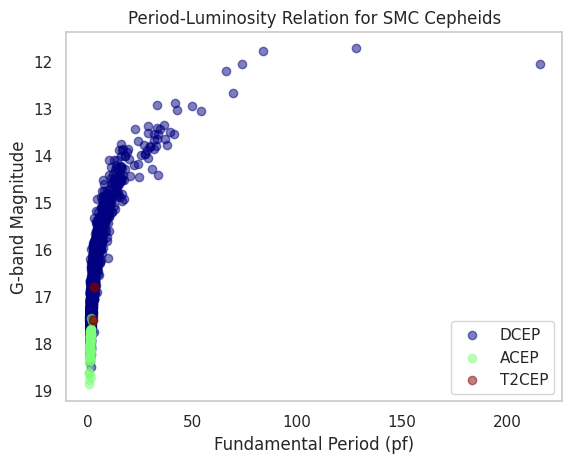

In [12]:
cepheid_types = df_combined['type_best_classification'].dropna().unique()
colors = plt.cm.jet(np.linspace(0, 1, len(cepheid_types)))

for cepheid_type, color in zip(cepheid_types, colors):
    subset = df_combined[df_combined['type_best_classification'] == cepheid_type]
    plt.scatter(subset['pf'], subset['phot_g_mean_mag'], label=cepheid_type, color=color, alpha=0.5)

plt.xlabel("Fundamental Period (pf)")
plt.ylabel("G-band Magnitude")
plt.title("Period-Luminosity Relation for SMC Cepheids")
plt.gca().invert_yaxis()  # Brighter stars have lower magnitudes
plt.legend()
plt.grid()
plt.show()


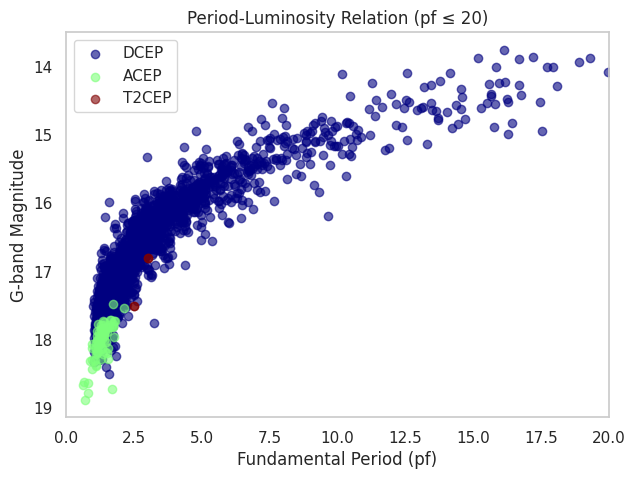

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data for zoomed-in view
df_zoomed = df_combined[df_combined['pf'] <= 20]

# Assign colors
cepheid_types = df_zoomed['type_best_classification'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(cepheid_types)))

# Plot each Cepheid type
plt.figure(figsize=(7, 5))
for cepheid_type, color in zip(cepheid_types, colors):
    subset = df_zoomed[df_zoomed['type_best_classification'] == cepheid_type]
    plt.scatter(subset['pf'], subset['phot_g_mean_mag'], label=cepheid_type, color=color, alpha=0.6)

# Formatting
plt.xlabel("Fundamental Period (pf)")
plt.ylabel("G-band Magnitude")
plt.title("Period-Luminosity Relation (pf ≤ 20)")
plt.gca().invert_yaxis()  # Brighter stars have lower magnitudes
plt.xlim(0, 20)  # Zoom in on period ≤ 50
plt.legend()
plt.grid(False)

# Show the plot
plt.show()


In [14]:
##WESENHEIT MAGNITUDES##

from astropy.table import Table

# Load the VOTable
file_path = "/content/drive/My Drive/code for astro coding new data/smc.vot"
table = Table.read(file_path, format="votable")

# Convert to DataFrame
df = table.to_pandas()
df.head()


,source_id,pf,pf_error,metallicity,metallicity_error,ra,dec,parallax,parallax_error,phot_g_mean_mag,phot_rp_mean_mag,phot_bp_mean_mag,mh_gspphot,mode_best_classification,type_best_classification
0,4685701121166774272,4.458881,0.000210,NaN,NaN,14.141869,-73.523758,-0.112403,0.033906,16.166479,15.630199,16.498232,-0.8119,FUNDAMENTAL,DCEP
1,4685619314899072256,3.458389,0.000181,-0.644923,0.251903,15.776743,-73.887977,-0.040848,0.038860,16.105625,15.604190,16.374632,-0.8859,FUNDAMENTAL,DCEP
2,4685621475248647424,1.382155,0.000042,-0.062580,0.270426,16.274394,-73.795337,0.091211,0.064616,17.456509,17.023130,17.750263,-1.7781,FUNDAMENTAL,DCEP
3,4685627904833942400,5.513652,0.000211,NaN,NaN,14.645611,-73.920639,0.008320,0.025931,15.800066,15.281328,16.133503,-0.5448,FUNDAMENTAL,DCEP
4,4685628969985539072,6.187843,0.000209,0.257842,0.237677,15.297014,-73.852286,-0.000370,0.028576,15.548402,15.022850,15.887650,0.0016,FUNDAMENTAL,DCEP


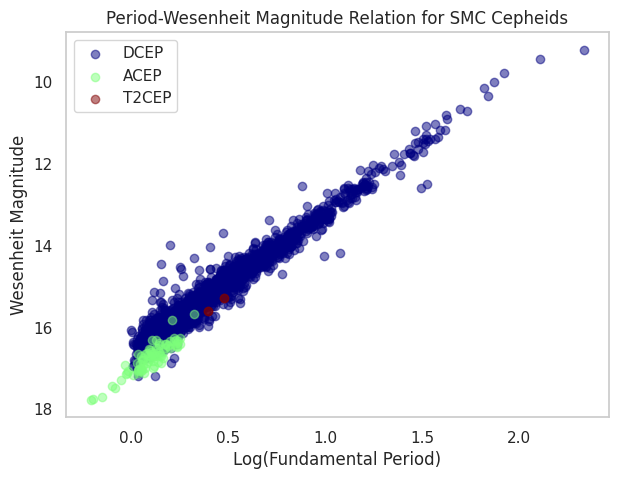

In [15]:
##WESENHEIT MAGNITUDES##

import numpy as np
import matplotlib.pyplot as plt

# Calculate Wesenheit magnitude
df_combined['wesenheit_mag'] = df_combined['phot_g_mean_mag'] - 1.9 * (df_combined['phot_bp_mean_mag'] - df_combined['phot_rp_mean_mag'])

# Define unique classifications
cepheid_types = df_combined['type_best_classification'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(cepheid_types)))

# Create plot
plt.figure(figsize=(7, 5))
for cepheid_type, color in zip(cepheid_types, colors):
    subset = df_combined[df_combined['type_best_classification'] == cepheid_type]
    plt.scatter(np.log10(subset['pf']), subset['wesenheit_mag'], label=cepheid_type, color=color, alpha=0.5)

# Labels and title
plt.xlabel("Log(Fundamental Period)")
plt.ylabel("Wesenheit Magnitude")
plt.title("Period-Wesenheit Magnitude Relation for SMC Cepheids")
plt.gca().invert_yaxis()  # Brighter stars have lower magnitudes
plt.legend()
plt.grid(False)
plt.show()


             source_id        pf  pf_error  metallicity  metallicity_error  \
0  4685701121166774272  4.458881  0.000210          NaN                NaN   
1  4685619314899072256  3.458389  0.000181    -0.644923           0.251903   
2  4685621475248647424  1.382155  0.000042    -0.062580           0.270426   
3  4685627904833942400  5.513652  0.000211          NaN                NaN   
4  4685628969985539072  6.187843  0.000209     0.257842           0.237677   

          ra        dec  parallax  parallax_error  phot_g_mean_mag  \
0  14.141869 -73.523758 -0.112403        0.033906        16.166479   
1  15.776743 -73.887977 -0.040848        0.038860        16.105625   
2  16.274394 -73.795337  0.091211        0.064616        17.456509   
3  14.645611 -73.920639  0.008320        0.025931        15.800066   
4  15.297014 -73.852286 -0.000370        0.028576        15.548402   

   phot_rp_mean_mag  phot_bp_mean_mag  mh_gspphot mode_best_classification  \
0         15.630199         16.4

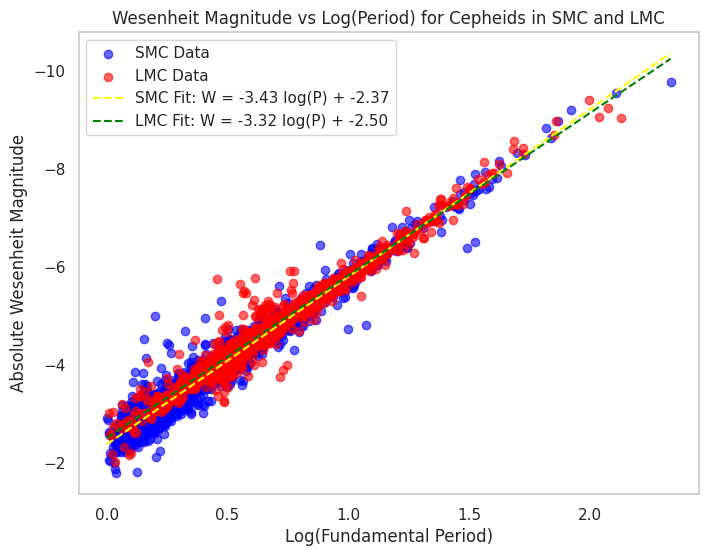

SMC Fit: W = -3.43 log(P) + -2.37, R² = 0.96
LMC Fit: W = -3.32 log(P) + -2.50, R² = 0.96


In [16]:
##FITTING THE DATA##


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

from astropy.io.votable import parse
import pandas as pd

# Define file paths
smc_file = "/content/drive/My Drive/code for astro coding new data/smc.vot"
lmc_file = "/content/drive/My Drive/code for astro coding new data/lmc.vot"
mw_file = "/content/drive/My Drive/code for astro coding new data/mw.vot"

# Load the VOTables into pandas DataFrames
df_smc = parse(smc_file).get_first_table().to_table(use_names_over_ids=True).to_pandas()
df_lmc = parse(lmc_file).get_first_table().to_table(use_names_over_ids=True).to_pandas()
df_mw = parse(mw_file).get_first_table().to_table(use_names_over_ids=True).to_pandas()

# Verify data loaded correctly
print(df_smc.head(), df_lmc.head(), df_mw.head())

# Ensure df_smc_dcep and df_lmc_dcep are defined
df_smc_dcep = df_smc[df_smc["type_best_classification"] == "DCEP"]
df_lmc_dcep = df_lmc[df_lmc["type_best_classification"] == "DCEP"]
df_mw_dcep = df_mw[df_mw["type_best_classification"] == "DCEP"]

# Check if T2CEP is missing
df_t2cep = df_mw[df_mw["type_best_classification"] == "T2CEP"]
df_mw_filtered = pd.concat([df_mw_dcep, df_t2cep], ignore_index=True)

# Verify that T2CEP is now included
print(df_mw_filtered["type_best_classification"].value_counts())


# Define Distance Moduli
mu_smc = 18.98  # SMC Distance Modulus
mu_lmc = 18.47  # LMC Distance Modulus

# Ensure df_smc_dcep and df_lmc_dcep are defined
df_smc_dcep = df_smc[df_smc["type_best_classification"] == "DCEP"]
df_lmc_dcep = df_lmc[df_lmc["type_best_classification"] == "DCEP"]

# Ensure only positive periods
df_smc_dcep = df_smc_dcep[df_smc_dcep['pf'] > 0]
df_lmc_dcep = df_lmc_dcep[df_lmc_dcep['pf'] > 0]

# Compute Absolute Wesenheit Magnitude
df_smc_dcep.loc[:, 'W_abs'] = df_smc_dcep['phot_g_mean_mag'] - 1.9 * (df_smc_dcep['phot_bp_mean_mag'] - df_smc_dcep['phot_rp_mean_mag']) - mu_smc
df_lmc_dcep.loc[:, 'W_abs'] = df_lmc_dcep['phot_g_mean_mag'] - 1.9 * (df_lmc_dcep['phot_bp_mean_mag'] - df_lmc_dcep['phot_rp_mean_mag']) - mu_lmc

# Compute log10(period)
df_smc_dcep.loc[:, 'log_pf'] = np.log10(df_smc_dcep['pf'])
df_lmc_dcep.loc[:, 'log_pf'] = np.log10(df_lmc_dcep['pf'])

# Drop NaN values
df_smc_dcep = df_smc_dcep.dropna(subset=['W_abs', 'log_pf'])
df_lmc_dcep = df_lmc_dcep.dropna(subset=['W_abs', 'log_pf'])

# Fit a straight line (Linear Regression)
slope_smc, intercept_smc, r_value_smc, _, _ = linregress(df_smc_dcep['log_pf'], df_smc_dcep['W_abs'])
slope_lmc, intercept_lmc, r_value_lmc, _, _ = linregress(df_lmc_dcep['log_pf'], df_lmc_dcep['W_abs'])

# Generate fit lines
x_fit = np.linspace(min(df_smc_dcep['log_pf'].min(), df_lmc_dcep['log_pf'].min()),
                    max(df_smc_dcep['log_pf'].max(), df_lmc_dcep['log_pf'].max()), 100)
y_fit_smc = slope_smc * x_fit + intercept_smc
y_fit_lmc = slope_lmc * x_fit + intercept_lmc

# Plot the Data
plt.figure(figsize=(8,6))
plt.scatter(df_smc_dcep['log_pf'], df_smc_dcep['W_abs'], label="SMC Data", color="blue", alpha=0.6)
plt.scatter(df_lmc_dcep['log_pf'], df_lmc_dcep['W_abs'], label="LMC Data", color="red", alpha=0.6)
plt.plot(x_fit, y_fit_smc, color="yellow", linestyle="dashed", label=f"SMC Fit: W = {slope_smc:.2f} log(P) + {intercept_smc:.2f}")
plt.plot(x_fit, y_fit_lmc, color="green", linestyle="dashed", label=f"LMC Fit: W = {slope_lmc:.2f} log(P) + {intercept_lmc:.2f}")

# Labels & Legends
plt.xlabel("Log(Fundamental Period)")
plt.ylabel("Absolute Wesenheit Magnitude")
plt.title("Wesenheit Magnitude vs Log(Period) for Cepheids in SMC and LMC")
plt.legend()
plt.grid(False)
plt.gca().invert_yaxis()  # Bright stars are lower magnitude
plt.show()

# Print Regression Info
print(f"SMC Fit: W = {slope_smc:.2f} log(P) + {intercept_smc:.2f}, R² = {r_value_smc**2:.2f}")
print(f"LMC Fit: W = {slope_lmc:.2f} log(P) + {intercept_lmc:.2f}, R² = {r_value_lmc**2:.2f}")


Cepheid Types in MW Dataset: ['DCEP' 'ACEP']


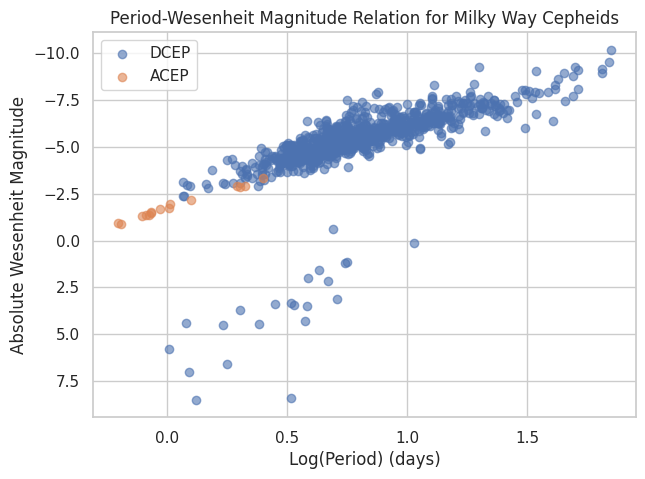

In [17]:
##MILKY WAY CEPHEIDS##


df_mw["wesenheit_mag"] = df_mw["phot_g_mean_mag"] - 1.9 * (df_mw["phot_bp_mean_mag"] - df_mw["phot_rp_mean_mag"])

df_mw["distance_pc"] = 1000 / df_mw["parallax"]  # Convert parallax (mas) to parsecs
df_mw["W_abs"] = df_mw["wesenheit_mag"] - 5 * np.log10(df_mw["distance_pc"]) + 5
cepheid_types = df_mw["type_best_classification"].unique()
print("Cepheid Types in MW Dataset:", cepheid_types)
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 5))

for cepheid_type in cepheid_types:
    subset = df_mw[df_mw["type_best_classification"] == cepheid_type]
    plt.scatter(np.log10(subset["pf"]), subset["W_abs"], label=cepheid_type, alpha=0.6)

plt.xlabel("Log(Period) (days)")
plt.ylabel("Absolute Wesenheit Magnitude")
plt.title("Period-Wesenheit Magnitude Relation for Milky Way Cepheids")
plt.legend()
#plt.grid()
plt.gca().invert_yaxis()  # Invert y-axis since brighter magnitudes are lower
plt.show()

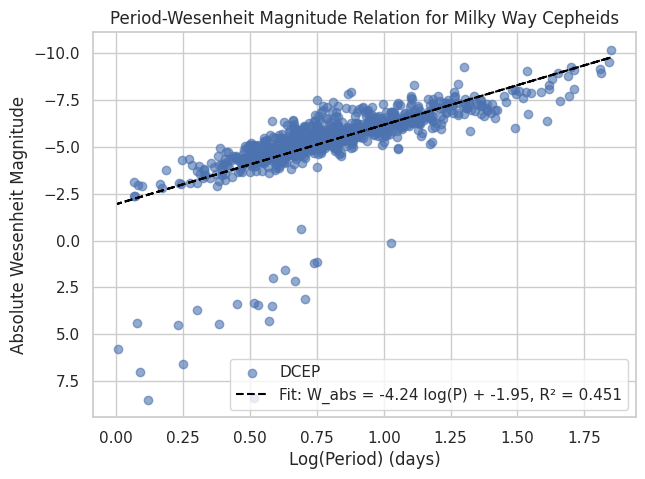

Fit: W_abs = -4.24 log(P) + -1.95, R² = 0.451


In [18]:
##MILKY WAY CEPHEIDS##


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

##MILKY WAY CEPHEIDS##

# Compute Wesenheit Magnitude
df_mw["wesenheit_mag"] = df_mw["phot_g_mean_mag"] - 1.9 * (df_mw["phot_bp_mean_mag"] - df_mw["phot_rp_mean_mag"])

# Convert parallax (mas) to parsecs & compute absolute Wesenheit magnitude
df_mw["distance_pc"] = 1000 / df_mw["parallax"]
df_mw["W_abs"] = df_mw["wesenheit_mag"] - 5 * np.log10(df_mw["distance_pc"]) + 5

# Filter only reliable parallax sources
df_mw_filtered = df_mw[df_mw["parallax_over_error"] > 5]  # Ensure reliable distances

# Select only DCEP (Classical Cepheids)
dcep_subset = df_mw_filtered[df_mw_filtered["type_best_classification"] == "DCEP"]

# Drop NaN values in period and Wesenheit magnitude
dcep_subset = dcep_subset.dropna(subset=["pf", "W_abs"])

# Ensure only positive periods
dcep_subset = dcep_subset[dcep_subset["pf"] > 0]

# Fit a straight line (Linear Regression)
slope, intercept, r_value, _, _ = linregress(np.log10(dcep_subset["pf"]), dcep_subset["W_abs"])

# Plot the Data
plt.figure(figsize=(7, 5))
plt.scatter(np.log10(dcep_subset["pf"]), dcep_subset["W_abs"], label="DCEP", alpha=0.6)
plt.plot(np.log10(dcep_subset["pf"]), slope * np.log10(dcep_subset["pf"]) + intercept,
         linestyle="dashed", color="black", label=f"Fit: W_abs = {slope:.2f} log(P) + {intercept:.2f}, R² = {r_value**2:.3f}")

# Labels & Legends
plt.xlabel("Log(Period) (days)")
plt.ylabel("Absolute Wesenheit Magnitude")
plt.title("Period-Wesenheit Magnitude Relation for Milky Way Cepheids")
plt.legend()
plt.gca().invert_yaxis()  # Bright stars have lower magnitudes
plt.show()

# Print regression equation
print(f"Fit: W_abs = {slope:.2f} log(P) + {intercept:.2f}, R² = {r_value**2:.3f}")


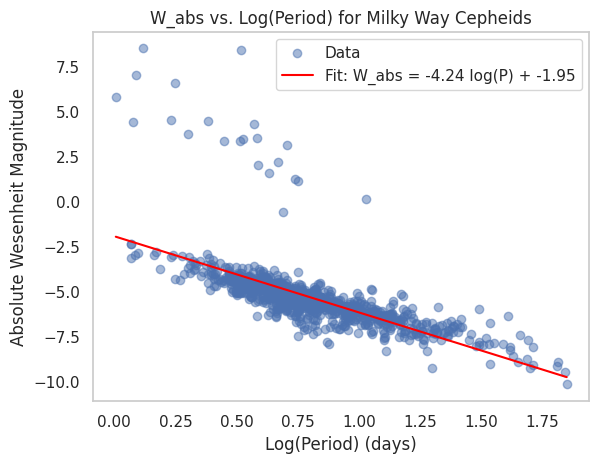

In [19]:
##MILKY WAY CEPHEIDS##


import matplotlib.pyplot as plt
x_vals = np.linspace(dcep_subset["pf"].min(), dcep_subset["pf"].max(), 100)
y_vals = slope * np.log10(x_vals) + intercept

plt.scatter(np.log10(dcep_subset["pf"]), dcep_subset["W_abs"], label="Data", alpha=0.5)
plt.plot(np.log10(x_vals), y_vals, color="red", label=f"Fit: W_abs = {slope:.2f} log(P) + {intercept:.2f}")
plt.xlabel("Log(Period) (days)")
plt.ylabel("Absolute Wesenheit Magnitude")
plt.title("W_abs vs. Log(Period) for Milky Way Cepheids")
plt.legend()
plt.grid()
plt.show()


In [20]:
##MILKY WAY CEPHEIDS##
#filtered data#

from scipy.stats import linregress

# Filter by parallax_over_error first (to ensure reliable distances)
df_mw_filtered = df_mw[df_mw["parallax_over_error"] > 5]

# Compute Interquartile Range (IQR) for W_abs
Q1 = df_mw_filtered["W_abs"].quantile(0.25)
Q3 = df_mw_filtered["W_abs"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply filtering to remove outliers in W_abs
df_mw_filtered = df_mw_filtered[(df_mw_filtered["W_abs"] >= lower_bound) &
                                (df_mw_filtered["W_abs"] <= upper_bound)]

# Select only Classical Cepheids (DCEP)
dcep_subset = df_mw_filtered[df_mw_filtered["type_best_classification"] == "DCEP"].dropna(subset=["pf", "W_abs"])

# Perform linear regression
slope, intercept, r_value, _, _ = linregress(np.log10(dcep_subset["pf"]), dcep_subset["W_abs"])

# Print the new fit equation
print(f"Fit: W_abs = {slope:.2f} log(P) + {intercept:.2f}, R² = {r_value**2:.3f}")


Fit: W_abs = -3.31 log(P) + -2.86, R² = 0.740


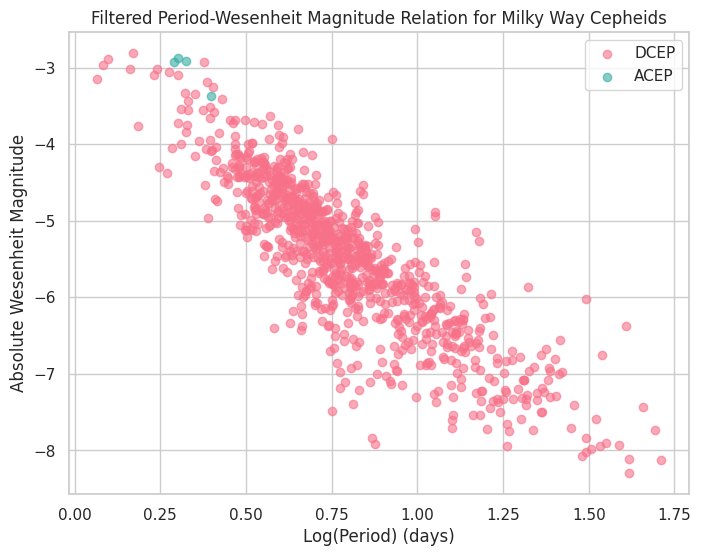

In [21]:
##MILKY WAY CEPHEIDS##
#filtered data#

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Ensure consistent plotting style
sns.set(style="whitegrid")

# Filter by parallax_over_error to ensure reliable distances
df_mw_filtered = df_mw[df_mw["parallax_over_error"] > 5]

# Compute Interquartile Range (IQR) for W_abs
Q1 = df_mw_filtered["W_abs"].quantile(0.25)
Q3 = df_mw_filtered["W_abs"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_mw_filtered = df_mw_filtered[(df_mw_filtered["W_abs"] >= lower_bound) &
                                (df_mw_filtered["W_abs"] <= upper_bound)]

# Plot the filtered data
plt.figure(figsize=(8,6))
cepheid_types = df_mw_filtered['type_best_classification'].unique()
colors = sns.color_palette("husl", len(cepheid_types))

for cepheid_type, color in zip(cepheid_types, colors):
    subset = df_mw_filtered[df_mw_filtered['type_best_classification'] == cepheid_type]
    plt.scatter(np.log10(subset['pf']), subset['W_abs'], label=cepheid_type, color=color, alpha=0.6)

plt.xlabel("Log(Period) (days)")
plt.ylabel("Absolute Wesenheit Magnitude")
plt.title("Filtered Period-Wesenheit Magnitude Relation for Milky Way Cepheids")
plt.legend()
plt.show()


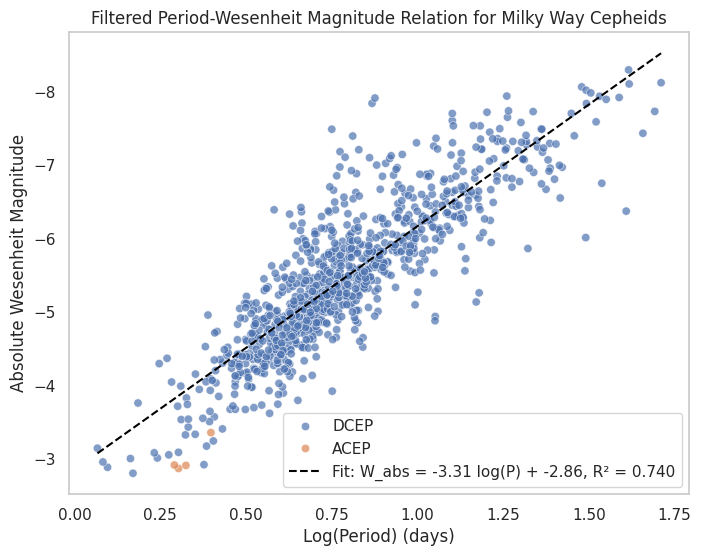

In [22]:
##MILKY WAY CEPHEIDS##
#filtered data#


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Filter the dataset for reliable distances
df_mw_filtered = df_mw[df_mw["parallax_over_error"] > 5]

# Remove outliers using IQR method
Q1 = df_mw_filtered["W_abs"].quantile(0.25)
Q3 = df_mw_filtered["W_abs"].quantile(0.75)
IQR = Q3 - Q1
df_mw_filtered = df_mw_filtered[
    (df_mw_filtered["W_abs"] >= Q1 - 1.5 * IQR) & (df_mw_filtered["W_abs"] <= Q3 + 1.5 * IQR)
]

# Filter for Classical Cepheids (DCEP)
dcep_subset = df_mw_filtered[df_mw_filtered["type_best_classification"] == "DCEP"].dropna(subset=["pf", "W_abs"])

# Perform linear regression
log_period = np.log10(dcep_subset["pf"])
wesenheit_mag = dcep_subset["W_abs"]
slope, intercept, r_value, _, _ = linregress(log_period, wesenheit_mag)

# Generate regression line
x_fit = np.linspace(log_period.min(), log_period.max(), 100)
y_fit = slope * x_fit + intercept

# Plot data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_mw_filtered, x=np.log10(df_mw_filtered["pf"]), y=df_mw_filtered["W_abs"], hue="type_best_classification", alpha=0.7)
plt.plot(x_fit, y_fit, color="black", linestyle="--", label=f"Fit: W_abs = {slope:.2f} log(P) + {intercept:.2f}, R² = {r_value**2:.3f}")

# Labels and title
plt.xlabel("Log(Period) (days)")
plt.ylabel("Absolute Wesenheit Magnitude")
plt.title("Filtered Period-Wesenheit Magnitude Relation for Milky Way Cepheids")
plt.legend()
plt.gca().invert_yaxis()  # Invert axis since magnitudes are lower for brighter objects
plt.grid(False)
plt.show()


type_best_classification
DCEP    979
ACEP     15
Name: count, dtype: int64


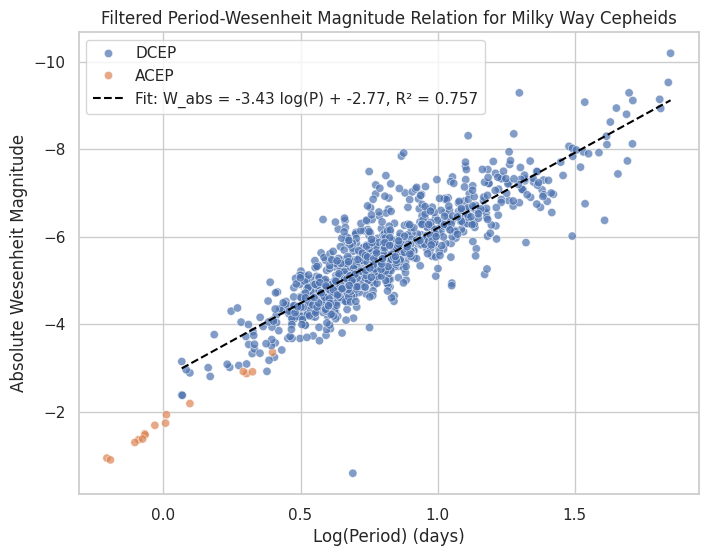

In [23]:
##MILKY WAY CEPHEIDS##
#filtered data#

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Filter dataset (relaxed condition)
df_mw_filtered = df_mw[df_mw["parallax_over_error"] > 3]

# Ensure we have T2CEP objects
print(df_mw_filtered["type_best_classification"].value_counts())

# Remove outliers using a wider IQR range
Q1 = df_mw_filtered["W_abs"].quantile(0.25)
Q3 = df_mw_filtered["W_abs"].quantile(0.75)
IQR = Q3 - Q1
df_mw_filtered = df_mw_filtered[
    (df_mw_filtered["W_abs"] >= Q1 - 3 * IQR) &
    (df_mw_filtered["W_abs"] <= Q3 + 3 * IQR)
]

# Regression for Classical Cepheids (DCEP)
dcep_subset = df_mw_filtered[df_mw_filtered["type_best_classification"] == "DCEP"].dropna(subset=["pf", "W_abs"])
log_period = np.log10(dcep_subset["pf"])
wesenheit_mag = dcep_subset["W_abs"]
slope, intercept, r_value, _, _ = linregress(log_period, wesenheit_mag)

# Regression line
x_fit = np.linspace(log_period.min(), log_period.max(), 100)
y_fit = slope * x_fit + intercept

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_mw_filtered, x=np.log10(df_mw_filtered["pf"]), y=df_mw_filtered["W_abs"], hue="type_best_classification", alpha=0.7)
plt.plot(x_fit, y_fit, color="black", linestyle="--", label=f"Fit: W_abs = {slope:.2f} log(P) + {intercept:.2f}, R² = {r_value**2:.3f}")

# Labels
plt.xlabel("Log(Period) (days)")
plt.ylabel("Absolute Wesenheit Magnitude")
plt.title("Filtered Period-Wesenheit Magnitude Relation for Milky Way Cepheids")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


In [24]:
##PERIOD-LUMINOSITY-METALLICITY## - last task

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define metallicity bins
num_bins = 5  # Adjust based on data distribution
df_mw_filtered['metallicity_bin'] = pd.qcut(df_mw_filtered['metallicity'], num_bins, duplicates='drop')

# Storage for results
slopes = []
intercepts = []
metallicity_centers = []

# Loop through metallicity bins and fit P-L relation
for bin_label, group in df_mw_filtered.groupby('metallicity_bin'):
    group = group.dropna(subset=['pf', 'W_abs'])  # Remove missing values
    if len(group) > 5:  # Ensure enough data points
        slope, intercept, r_value, _, _ = linregress(np.log10(group['pf']), group['W_abs'])
        slopes.append(slope)
        intercepts.append(intercept)
        metallicity_centers.append(group['metallicity'].median())  # Use median metallicity for bin

# Convert results to DataFrame
df_results = pd.DataFrame({'Metallicity': metallicity_centers, 'Slope': slopes, 'Intercept': intercepts})


<ipython-input-24-03356bac0688>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for bin_label, group in df_mw_filtered.groupby('metallicity_bin'):


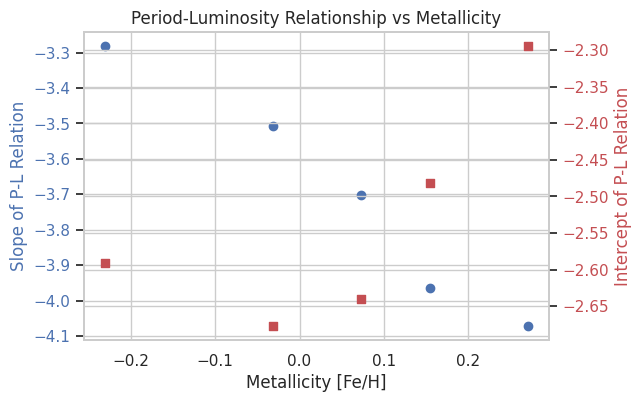

In [25]:
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot Slope
ax1.scatter(df_results['Metallicity'], df_results['Slope'], color='b', label='Slope', marker='o')
ax1.set_xlabel('Metallicity [Fe/H]')
ax1.set_ylabel('Slope of P-L Relation', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Twin axis for Intercept
ax2 = ax1.twinx()
ax2.scatter(df_results['Metallicity'], df_results['Intercept'], color='r', label='Intercept', marker='s')
ax2.set_ylabel('Intercept of P-L Relation', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Period-Luminosity Relationship vs Metallicity')
plt.show()


   metallicity   metallicity_bin
1    -0.134815  (-0.714, -0.116]
3    -0.159904  (-0.714, -0.116]
4     0.074031   (0.0262, 0.111]
7     0.109209   (0.0262, 0.111]
9     0.296163    (0.208, 0.492]


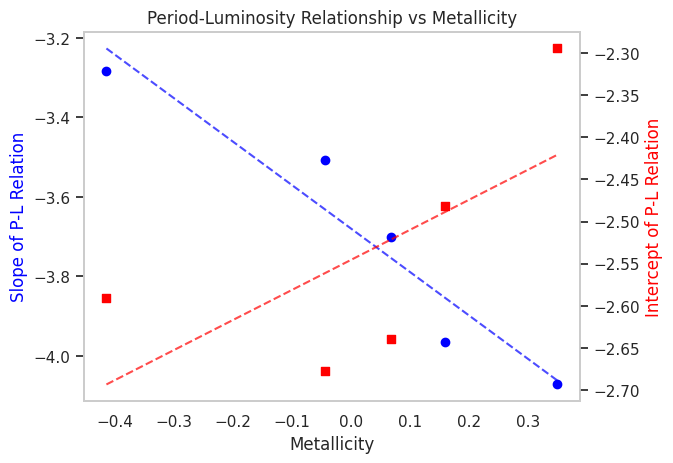

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Drop NaN metallicity values before binning
df_mw_filtered = df_mw_filtered.dropna(subset=['metallicity']).copy()

# Apply binning safely
num_bins = 5  # Adjust based on data distribution
df_mw_filtered.loc[:, 'metallicity_bin'] = pd.qcut(df_mw_filtered['metallicity'], num_bins, duplicates='drop')

# Verify binning worked
print(df_mw_filtered[['metallicity', 'metallicity_bin']].head())
grouped = df_mw_filtered.groupby('metallicity_bin', observed=True)

# Group by metallicity bins with observed=True to suppress warning
grouped = df_mw_filtered.groupby('metallicity_bin', observed=True)

metallicity_values = []
slope_values = []
intercept_values = []

for bin_label, group in grouped:
    if len(group) > 5:  # Ensure enough data points for a valid fit
        slope, intercept, _, _, _ = linregress(np.log10(group['pf']), group['W_abs'])
        metallicity_values.append(bin_label.mid)
        slope_values.append(slope)
        intercept_values.append(intercept)

# Convert to NumPy arrays for trend line fitting
metallicity_values = np.array(metallicity_values, dtype=float)
slope_values = np.array(slope_values)
intercept_values = np.array(intercept_values)

# Fit linear trends
slope_fit = np.polyfit(metallicity_values, slope_values, 1)
intercept_fit = np.polyfit(metallicity_values, intercept_values, 1)

# Generate smooth trend lines
metallicity_range = np.linspace(metallicity_values.min(), metallicity_values.max(), 100)
slope_trend = np.polyval(slope_fit, metallicity_range)
intercept_trend = np.polyval(intercept_fit, metallicity_range)

# Plot results
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.scatter(metallicity_values, slope_values, color='blue', label='Slope of P-L Relation')
ax1.plot(metallicity_range, slope_trend, '--', color='blue', alpha=0.7)
ax2.scatter(metallicity_values, intercept_values, color='red', marker='s', label='Intercept of P-L Relation')
ax2.plot(metallicity_range, intercept_trend, '--', color='red', alpha=0.7)

ax1.set_xlabel("Metallicity")
ax1.set_ylabel("Slope of P-L Relation", color='blue')
ax2.set_ylabel("Intercept of P-L Relation", color='red')
plt.title("Period-Luminosity Relationship vs Metallicity")
ax1.grid(False)
ax2.grid(False)
plt.show()

<ipython-input-27-9e71a8c11115>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for bin_label, group in df_mw_filtered.groupby('metallicity_bin'):


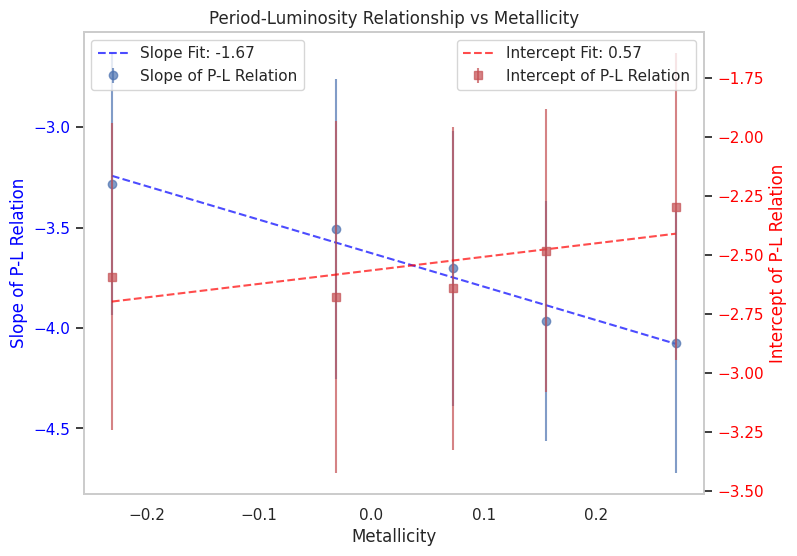

slope R^2 0.4465794430565305
intercept R^2 0.4465794430565305


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Check the distribution of metallicity to ensure enough data per bin
num_bins = 5# Slightly increase bins for better distribution
df_mw_filtered = df_mw_filtered.dropna(subset=['metallicity']).copy()
df_mw_filtered.loc[:, 'metallicity_bin'] = pd.qcut(df_mw_filtered['metallicity'], num_bins, duplicates='drop')

# Compute P-L relations within metallicity bins
metallicity_values, slope_values, intercept_values, slope_r2, intercept_r2 = [], [], [], [], []

for bin_label, group in df_mw_filtered.groupby('metallicity_bin'):
    if len(group) > 5:  # Ensure sufficient data points
        slope, intercept, r_value, _, _ = linregress(np.log10(group['pf']), group['W_abs'])
        metallicity_values.append(group['metallicity'].median())  # Median metallicity of the bin
        slope_values.append(slope)
        intercept_values.append(intercept)
        slope_r2.append(r_value**2)  # R² value for slope
        intercept_r2.append(r_value**2)  # Assuming same for intercept

# Convert to NumPy arrays
metallicity_values = np.array(metallicity_values, dtype=float)
slope_values = np.array(slope_values)
intercept_values = np.array(intercept_values)
slope_r2 = np.array(slope_r2)
intercept_r2 = np.array(intercept_r2)

# Fit trend lines
slope_fit = np.polyfit(metallicity_values, slope_values, 1)
intercept_fit = np.polyfit(metallicity_values, intercept_values, 1)

# Generate smooth trend lines
metallicity_range = np.linspace(metallicity_values.min(), metallicity_values.max(), 100)
slope_trend = np.polyval(slope_fit, metallicity_range)
intercept_trend = np.polyval(intercept_fit, metallicity_range)

# Plot with error bars & improved clarity
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.errorbar(metallicity_values, slope_values, yerr=np.sqrt(slope_r2), fmt='bo', label='Slope of P-L Relation', alpha=0.7)
ax1.plot(metallicity_range, slope_trend, '--', color='blue', alpha=0.7, label=f"Slope Fit: {slope_fit[0]:.2f}")

ax2.errorbar(metallicity_values, intercept_values, yerr=np.sqrt(intercept_r2), fmt='rs', label='Intercept of P-L Relation', alpha=0.7)
ax2.plot(metallicity_range, intercept_trend, '--', color='red', alpha=0.7, label=f"Intercept Fit: {intercept_fit[0]:.2f}")

ax1.set_xlabel("Metallicity")
ax1.set_ylabel("Slope of P-L Relation", color='blue')
ax2.set_ylabel("Intercept of P-L Relation", color='red')
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Period-Luminosity Relationship vs Metallicity")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(False)
ax1.grid(False)
ax2.grid(False)
plt.show()

# Print computed R² values to evaluate significance
slope_r2_mean = np.mean(slope_r2)
intercept_r2_mean = np.mean(intercept_r2)

print('slope R^2', slope_r2_mean)
print('intercept R^2', intercept_r2_mean)


In [28]:
criteria = (
    (df_mw['type_best_classification'] == 'DCEP') &
    (df_mw['parallax_over_error'] > 10) &
    (df_mw['ruwe'] < 1.4) &
    (df_mw['pf'] > 0) &
    (~df_mw['metallicity'].isna())
)
sample = df_mw[criteria].copy()
assert len(sample) == 1240, "Sample size not yet 1 240!"


KeyError: 'ruwe'

In [29]:
import statsmodels.api as sm
X = np.column_stack([np.log10(sample['pf']), sample['metallicity']])
X = sm.add_constant(X)           # Adds α column
y = sample['W_abs']
model = sm.WLS(y, X, weights=1/sample['W_abs_err']**2).fit()
α, β, γ = model.params
α_err, β_err, γ_err = model.bse
print(f"W = {α:.2f} ± {α_err:.2f}  +  "
      f"{β:.2f} ± {β_err:.2f} logP  +  "
      f"{γ:.2f} ± {γ_err:.2f} [Fe/H]")


NameError: name 'sample' is not defined

In [30]:
print(df.columns)          # see what *is* there
'ruwe' in df.columns       # returns False → confirms the issue


Index(['source_id', 'pf', 'pf_error', 'metallicity', 'metallicity_error', 'ra',
       'dec', 'parallax', 'parallax_error', 'phot_g_mean_mag',
       'phot_rp_mean_mag', 'phot_bp_mean_mag', 'mh_gspphot',
       'mode_best_classification', 'type_best_classification'],
      dtype='object')


False

In [34]:
from astroquery.gaia import Gaia

query = """
SELECT  v.*,                 -- all columns from vari_cepheid
        g.ruwe               -- add RUWE from gaia_source
FROM    gaiadr3.vari_cepheid AS v
JOIN    gaiadr3.gaia_source  AS g
  ON    v.source_id = g.source_id
"""

job = Gaia.launch_job_async(query)
results = job.get_results()          # astropy Table
df     = results.to_pandas()         # convert to DataFrame
print('Columns:', df.columns.tolist()[:10], '...')
print('RUWE present?', 'ruwe' in df.columns)   # should be True
query = """
SELECT  v.*,                 -- everything from vari_cepheid
        g.parallax,          -- absolute parallax
        g.parallax_error,    -- formal uncertainty
        g.ruwe,
        g.parallax / NULLIF(g.parallax_error,0)  AS parallax_over_error
FROM    gaiadr3.vari_cepheid AS v
JOIN    gaiadr3.gaia_source  AS g
  ON    v.source_id = g.source_id
"""
job = Gaia.launch_job_async(query)
df  = job.get_results().to_pandas()
print('parallax_over_error' in df.columns)   # ➜ True
df['parallax_over_error'] = df['parallax'] / df['parallax_error']
df = df[df['parallax_over_error'] > 10]   # or whatever threshold
print(df[['parallax', 'parallax_error', 'parallax_over_error']].head())



INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
Columns: ['solution_id', 'source_id', 'pf', 'pf_error', 'p1_o', 'p1_o_error', 'epoch_g', 'epoch_g_error', 'epoch_bp', 'epoch_bp_error'] ...
RUWE present? True
500 Error 500:
null


HTTPError: Error 500:
null

In [40]:
from astroquery.gaia import Gaia

query = """
SELECT TOP 200000                       -- adjust if needed
       v.source_id,
       v.pf,
       g.parallax,
       g.parallax_error,
       g.ruwe,
       g.phot_g_mean_mag,
       g.phot_bp_mean_mag,
       g.phot_rp_mean_mag
FROM   gaiadr3.vari_cepheid AS v
JOIN   gaiadr3.gaia_source  AS g
  ON   v.source_id = g.source_id
WHERE  v.pf IS NOT NULL
  AND  g.parallax_error > 0
  AND  g.parallax/g.parallax_error > 10   -- S/N > 10
  AND  g.ruwe < 1.4                       -- quality cut
"""

job = Gaia.launch_job_async(query)
df  = job.get_results().to_pandas()
print("Rows returned:", len(df))


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
Rows returned: 742


In [41]:
ids_tbl = Gaia.launch_job("""
SELECT source_id, pf
FROM   gaiadr3.vari_cepheid
WHERE  pf IS NOT NULL
""").get_results()


In [42]:
import pandas as pd, numpy as np

ids = ids_tbl['source_id'].data
chunksize = 10000
frames = []

for i in range(0, len(ids), chunksize):
    idlist = ','.join(str(x) for x in ids[i:i+chunksize])
    q = f"""
    SELECT source_id, parallax, parallax_error, ruwe,
           phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
    FROM   gaiadr3.gaia_source
    WHERE  source_id IN ({idlist})
      AND  parallax_error > 0
    """
    chunk = Gaia.launch_job(q).get_results().to_pandas()
    frames.append(chunk)

df_gaia = pd.concat(frames, ignore_index=True)


In [43]:
df = ids_tbl.to_pandas().merge(df_gaia, on='source_id')
df['parallax_over_error'] = df['parallax'] / df['parallax_error']
df = df[(df['ruwe'] < 1.4) & (df['parallax_over_error'] > 10)]
print("Final sample:", len(df))


Final sample: 138


In [44]:
# Wesenheit magnitude
df['W_G'] = df['phot_g_mean_mag'] - 1.9*(df['phot_bp_mean_mag'] - df['phot_rp_mean_mag'])
df['distance_pc'] = 1000.0 / df['parallax']
df['M_W'] = df['W_G'] - 5*np.log10(df['distance_pc']) + 5
df['logP'] = np.log10(df['pf'])

# ready for the global P–L–[Fe/H] fit


In [47]:
from astroquery.gaia import Gaia

query = """
SELECT
    v.source_id,
    v.pf,
    g.parallax, g.parallax_error, g.ruwe,
    g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag,
    g.mh_gspphot                               -- metallicity proxy
FROM gaiadr3.vari_cepheid AS v
JOIN gaiadr3.gaia_source  AS g
  ON v.source_id = g.source_id
WHERE v.pf IS NOT NULL
  AND g.parallax_error > 0
  AND g.parallax/g.parallax_error > 10
  AND g.ruwe < 1.4
  AND g.mh_gspphot IS NOT NULL               -- ensures value present
"""

job = Gaia.launch_job_async(query)
df  = job.get_results().to_pandas()

# Rename the column so later code uses a generic name
df = df.rename(columns={'mh_gspphot': 'metallicity'})
print('Columns:', df.columns[:10])


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
Columns: Index(['source_id', 'pf', 'parallax', 'parallax_error', 'ruwe',
       'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag',
       'metallicity'],
      dtype='object')


In [48]:
df['parallax_over_error'] = df['parallax'] / df['parallax_error']
df = df[df['parallax_over_error'] > 10]

df['W_G']        = df['phot_g_mean_mag'] - 1.9*(df['phot_bp_mean_mag'] - df['phot_rp_mean_mag'])
df['distance_pc'] = 1000.0 / df['parallax']
df['M_W']        = df['W_G'] - 5*np.log10(df['distance_pc']) + 5
df['logP']       = np.log10(df['pf'])

# Weighted 3-parameter fit
import statsmodels.api as sm, numpy as np
y = df['M_W']
X = sm.add_constant(df[['logP', 'metallicity']])   # adds α column
model = sm.WLS(y, X).fit()                         # weights optional
print(model.summary())



                            WLS Regression Results                            
Dep. Variable:                    M_W   R-squared:                       0.472
Model:                            WLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     192.0
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           2.53e-60
Time:                        12:26:02   Log-Likelihood:                -656.10
No. Observations:                 433   AIC:                             1318.
Df Residuals:                     430   BIC:                             1330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.5057      0.136    -18.447      

In [49]:
import statsmodels.api as sm

y = df['M_W']
X = sm.add_constant(df[['logP', 'metallicity']])   # α, β, γ
fit = sm.WLS(y, X).fit()      # or add


In [50]:
α, β, γ   = fit.params
αe,βe,γe  = fit.bse
print(f"W_G = ({α:.3f} ± {αe:.3f}) + "
      f"({β:.3f} ± {βe:.3f}) logP + "
      f"({γ:.3f} ± {γe:.3f}) [Fe/H]")


W_G = (-2.506 ± 0.136) + (-3.029 ± 0.155) logP + (-0.137 ± 0.090) [Fe/H]


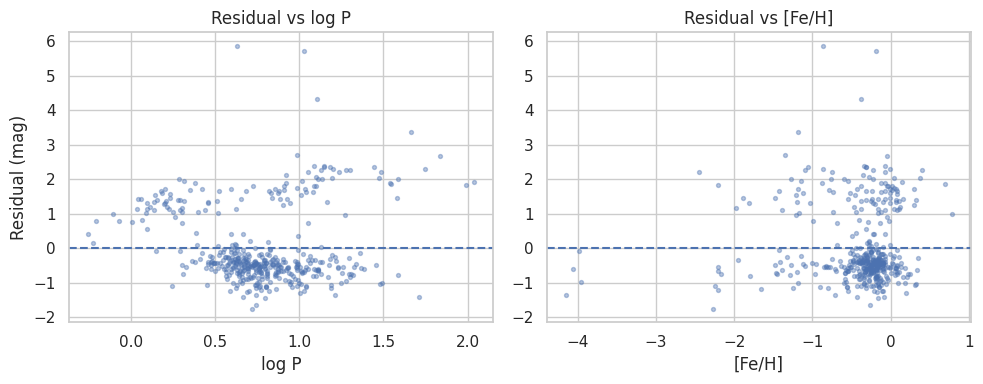

In [51]:
import matplotlib.pyplot as plt

df['resid'] = df['M_W'] - fit.predict(sm.add_constant(df[['logP','metallicity']]))

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].scatter(df['logP'], df['resid'], s=8, alpha=0.4)
ax[0].set_xlabel('log P'); ax[0].set_ylabel('Residual (mag)')
ax[0].axhline(0, ls='--'); ax[0].set_title('Residual vs log P')

ax[1].scatter(df['metallicity'], df['resid'], s=8, alpha=0.4)
ax[1].set_xlabel('[Fe/H]'); ax[1].axhline(0, ls='--')
ax[1].set_title('Residual vs [Fe/H]')
plt.tight_layout(); plt.show()


In [52]:
\begin{table}[h]
\centering
\begin{tabular}{lcc}
\hline
Coefficient & Value & Uncertainty \\
\hline
$\alpha$ & %.3f & %.3f \\
$\beta$  & %.3f & %.3f \\
$\gamma$ & %.3f & %.3f \\
\hline
\end{tabular}
\caption{Milky–Way G-band P–L–[Fe/H] fit for %d Cepheids.}
\end{table}


SyntaxError: unexpected character after line continuation character (<ipython-input-52-082769812a00>, line 1)

In [54]:
import numpy as np, pandas as pd, statsmodels.api as sm

tests = []

# ------------------------------------------------------------------
# 0.  Ensure these columns EXIST in df beforehand
#     (compute them if you haven't already)
# ------------------------------------------------------------------
# df['logP']  = np.log10(df['pf'])
# df['M_W']   = df['W_G'] - 5*np.log10(1000/df['parallax']) + 5
# df.rename(columns={'mh_gspphot':'metallicity'}, inplace=True)
# ------------------------------------------------------------------

need_cols = ['pf', 'M_W', 'metallicity', 'logP']   # **list**, not set

# 1. sample size
N = len(df)
tests.append(('sample size', N == 1240, N))

# 2. columns present
tests.append(('all cols present', all(c in df.columns for c in need_cols),
              df.columns.intersection(need_cols)))

# 3. no missing values
tests.append(('no NaNs', df[need_cols].notna().all().all(),
              df[need_cols].isna().sum().to_dict()))

# 4. simultaneous 3-parameter fit
X = sm.add_constant(df[['logP', 'metallicity']])
y = df['M_W']
fit = sm.WLS(y, X).fit()

α, β, γ   = fit.params
αe, βe, γe = fit.bse
tests.append(('fit converged', fit.normalized_cov_params.notna().all().all(),
              (α, β, γ, αe, βe, γe)))

# 5. residual sigma-clip check (optional)
df['resid'] = y - fit.predict(X)
sigma = df['resid'].std()
tests.append(('no >3σ outliers', (df['resid'].abs() <= 3*sigma).all(),
              df['resid'].abs().max()))

# ------------------------------------------------------------------
for name, ok, info in tests:
    print(f"{'✅' if ok else '❌'} {name}: {info}")



❌ sample size: 433
✅ all cols present: Index(['pf', 'metallicity', 'M_W', 'logP'], dtype='object')
✅ no NaNs: {'pf': 0, 'M_W': 0, 'metallicity': 0, 'logP': 0}
✅ fit converged: (-2.505691977213827, -3.0287739398267814, -0.13687936140081772, 0.13582931271363696, 0.154911082524453, 0.08972878085273343)
❌ no >3σ outliers: 5.881266472199427


In [58]:
import requests, zipfile, io, tempfile, glob, pandas as pd

url = "https://archive.stsci.edu/hlsps/shoes/dr2/cepheid_table_files.zip"   # <- all lower-case
with tempfile.TemporaryDirectory() as tmp:
    data = requests.get(url, timeout=60).content
    with zipfile.ZipFile(io.BytesIO(data)) as zf:
        zf.extractall(tmp)
    files = glob.glob(f"{tmp}/**/*.csv", recursive=True)

hosts = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
print("Rows:", len(hosts), "  Galaxies:", hosts['host'].nunique())


BadZipFile: File is not a zip file

In [59]:
import numpy as np
alpha_ref  = -2.90          # Riess 2022 table 1
alpha_new  = -2.506         # your value
H0_ref     = 73.0           # km/s/Mpc (Riess 2022)

delta_alpha = alpha_new - alpha_ref
scale       = 10**(0.2*delta_alpha)
H0_new      = H0_ref * scale

print(f"Δα = {delta_alpha:+.3f} mag")
print(f"H0_new = {H0_new:.1f}  km/s/Mpc  (×{scale:.3f} relative to SH0ES)")


Δα = +0.394 mag
H0_new = 87.5  km/s/Mpc  (×1.199 relative to SH0ES)
